[3.3]实现对率回归，给出西瓜数据集3.0a结果。

In [1]:
import pandas as pd
dataset = pd.read_csv('3.0a.csv')
dataset



,编号,密度,含糖率,好瓜
0,1,0.697,0.4600,1
1,2,0.774,0.3760,1
2,3,0.634,0.2640,1
3,4,0.608,0.3180,1
4,5,0.556,0.2150,1
5,6,0.403,0.2370,1
6,7,0.481,0.1490,1
7,8,0.437,0.2110,1
8,9,0.666,0.0910,0
9,10,0.243,0.0267,0


In [2]:
x = dataset[["密度", "含糖率"]]
y = dataset['好瓜']
good_melon = dataset[dataset['好瓜'] == 1]
bad_melon = dataset[dataset['好瓜'] == 0]

       密度     含糖率
0   0.697  0.4600
1   0.774  0.3760
2   0.634  0.2640
3   0.608  0.3180
4   0.556  0.2150
5   0.403  0.2370
6   0.481  0.1490
7   0.437  0.2110
8   0.666  0.0910
9   0.243  0.0267
10  0.245  0.0570
11  0.343  0.0990
12  0.639  0.1610
13  0.657  0.1980
14  0.360  0.3700
15  0.593  0.0420
16  0.719  0.1030


D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


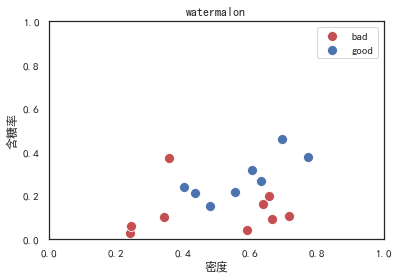

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
print(x)
f1 = plt.figure(1)
plt.title('watermalon')
plt.xlabel('密度')
plt.ylabel('含糖率')
plt.xlim(0, 1)
plt.ylim(0, 1)
sns.scatterplot(bad_melon["密度"], bad_melon["含糖率"],
            marker='o', color='r', s=100, label='bad')
sns.scatterplot(good_melon["密度"], good_melon["含糖率"],
            marker='o', color='b', s=100, label='good')
plt.legend(loc='upper right')


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test,Y_train,Y_test = train_test_split(
    x, y, test_size=0.5, random_state=0)
print(X_train, X_test)


       密度    含糖率
7   0.437  0.211
16  0.719  0.103
11  0.343  0.099
3   0.608  0.318
0   0.697  0.460
5   0.403  0.237
15  0.593  0.042
12  0.639  0.161        密度     含糖率
1   0.774  0.3760
6   0.481  0.1490
8   0.666  0.0910
9   0.243  0.0267
13  0.657  0.1980
4   0.556  0.2150
2   0.634  0.2640
14  0.360  0.3700
10  0.245  0.0570


[1 0 0 0 0 1 1 1 0]
[[-0.07509754  0.39827223]]
-0.07509754477001591 0.398272229035131


D:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


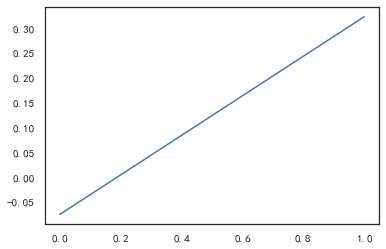

In [7]:
import numpy as np


def log_regression():
    log_regression = LogisticRegression()
    log_regression.fit(X_train, Y_train)
    y_pred = log_regression.predict(X_test)
    print(y_pred)
    # print(metrics.confusion_matrix(Y_test, y_pred))
    # print(metrics.classification_report(Y_test, y_pred))
    print(log_regression.coef_)
    theta1, theta2 = log_regression.coef_[0][0], log_regression.coef_[0][1]
    print(theta1,theta2)
    x_pred = np.linspace(0, 1, 100)
    line_pred = theta1+theta2*x_pred
    sns.lineplot(x_pred, line_pred)
    plt.show()
    pass


log_regression()
